### Importing the Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

### Importing the Dataset

In [6]:
df = pd.read_csv('featureszds.csv')
features = df.columns.tolist()[:-1]
df.head()

,age,gender,class
0,56.0,Male,SB
1,45.0,Female,SB
2,74.0,Male,SB
3,54.0,Female,SB
4,80.0,Male,SB


### Checking for Missing Values

In [7]:
df.isnull().sum()

age        55
gender      0
class     675
dtype: int64

### Handle Missing Values

In [11]:
df = df.dropna(subset=['class'])
df['age'].fillna(df['age'].mean(), inplace=True)
df['gender'].replace('Unknown', df['gender'].mode()[0], inplace=True)
df.isnull().sum()

age       0
gender    0
class     0
dtype: int64

### Dataset Stats

### Gender Ratio

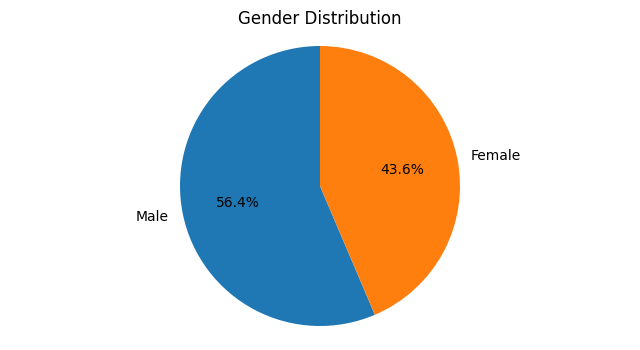

In [12]:
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(8, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

### Age Distribution

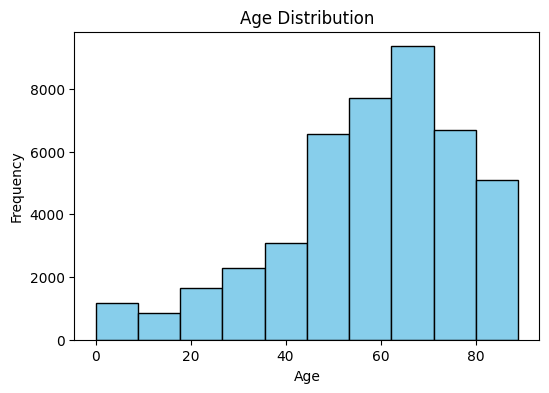

In [13]:
plt.figure(figsize=(6, 4))
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

### Class Distribution

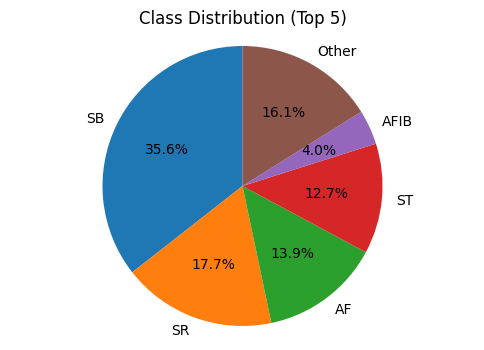

In [14]:
class_counts = df['class'].value_counts()
top_classes = class_counts.head(5)
other_count = class_counts.sum() - top_classes.sum()
class_data = pd.concat([top_classes, pd.Series({'Other': other_count})])
plt.figure(figsize=(6, 4))
plt.pie(class_data, labels=class_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution (Top 5)')
plt.axis('equal')
plt.show()

### Label Encodeing on Gender

In [5]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

### Label Encodeing on 'y'

In [6]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

### Split Features and Labels

In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Checking for Outliers

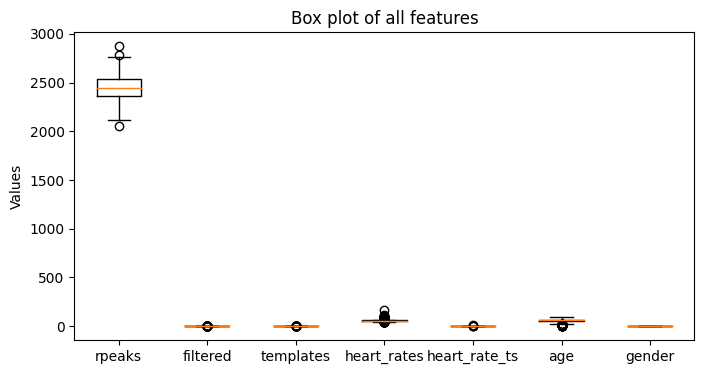

In [9]:
plt.figure(figsize=(8, 4))
plt.boxplot(X, labels=features)
plt.ylabel('Values')
plt.title('Box plot of all features')
plt.grid(False)
plt.show()

### Handling Outliers

In [165]:
from scipy.stats.mstats import winsorize
X = np.apply_along_axis(lambda x: winsorize(x, limits=[0.05, 0.05]), axis=0, arr=X)

### Normalize the Features

In [166]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Boxplot of Features after Outliers Removal and Normalization

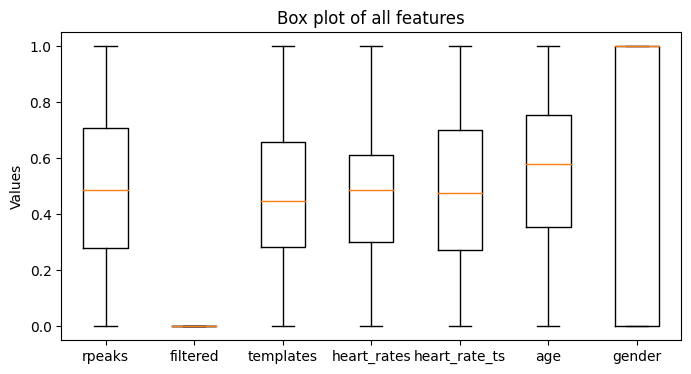

In [167]:
plt.figure(figsize=(8, 4))
plt.boxplot(X, labels=features)
plt.ylabel('Values')
plt.title('Box plot of all features')
plt.grid(False)
plt.show()

### Dimensionality Reduction using t-SNE

In [ ]:
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

### Visualize the Features in Lower Dimension

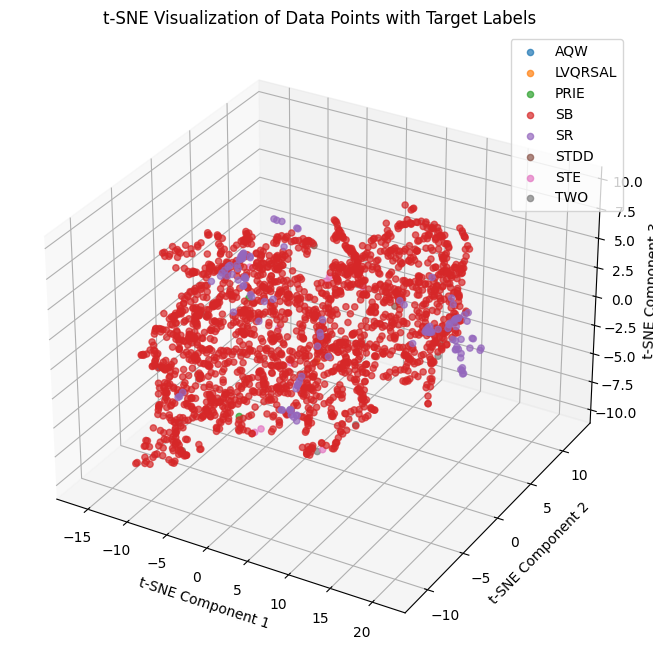

In [184]:
fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(111, projection='3d')
for label in np.unique(y):
    ax.scatter(X_tsne[y == label, 0], X_tsne[y == label, 1],
               X_tsne[y == label, 2], label=label, alpha=0.7)
ax.set_title('t-SNE Visualization of Data Points with Target Labels')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.legend()
plt.grid(False)
plt.show()

### Correlation Matrix of t-SNE Components

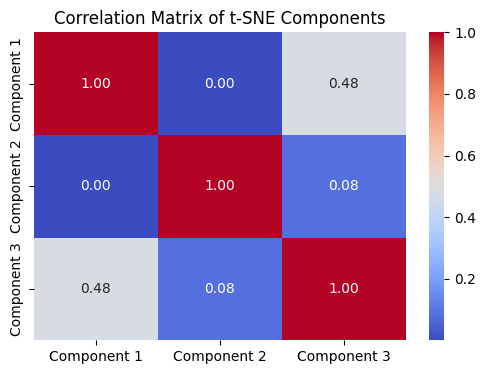

In [169]:
df_tsne = pd.DataFrame(X_tsne, columns=['Component 1', 'Component 2', 'Component 3'])
correlation_matrix_tsne = df_tsne.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_tsne, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of t-SNE Components')
plt.show()